In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def fsyst(x, p, t):
    f = np.empty((1,))
    if t < p['T']:
        at = np.cosh(p['rate']*(t- p['T']))
    else:
        at = 1.
    lam = p['lambda_min'] + p['delta_lambda'] / at
    f[0] = -x[0]*((x[0]- p['A'] - p['s']*lam)**2 + lam)
    return f
def f(t,X):
    return fsyst(X,p,t)

Text(0, 0.5, '$x$')

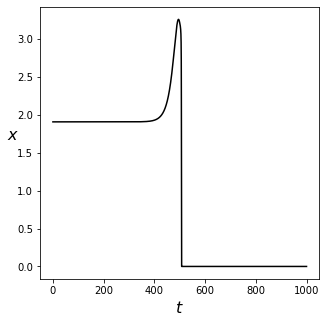

In [16]:
p={}

p['A']= 3.2
p['s']= 4.0
p['lambda_min'] = -0.5
p['delta_lambda'] =  0.505
p['rate'] = 0.05 

p['T']=500
p['dt']=0.1
p['Ttime'] = 1000.
p['steps']= int(p['Ttime']//p['dt'])
#Initial conditions
X_0= [p['A'] + p['s'] * p['lambda_min'] + np.sqrt(-p['lambda_min'])]
sol1 = solve_ivp(f,(0,p['Ttime']),X_0,method='RK45',vectorized=True,max_step=p['dt'])

plt.figure(1,figsize=(5,5))
plt.plot(sol1.t,sol1.y[0,:],'k')
plt.xlabel(r'$t$',fontsize=16); plt.ylabel(r'$x$',fontsize=16,rotation=0)